In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# read .tab file into pandas dataframe
campaigns = pd.read_csv('../assignment_2023_2/NAVCO 1.2 Updated.tab', sep='\t')
campaigns.sample(5)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,126.0,LURD,Liberia,1999.0,2003.0,Taylor regime,1.0,0.0,0.0,0.0,...,0.0,1600.0,6500.0,0.002086,1.0,0.0,NaN,1.0,1.0,1.0
107,207.0,Somali rebels (Ogaden),Ethiopia,1976.0,1980.0,Ethiopian occupation of Ogaden,0.0,0.0,1.0,0.0,...,0.0,1616.0,20000.0,0.000549,1.0,0.0,NaN,1.0,1.0,1.0
657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,196.0,Serb militias,Bosnia-Herzegovina,1992.0,1995.0,Bosnian government,0.0,0.0,1.0,0.0,...,0.0,1286.0,70000.0,0.018212,1.0,0.0,NaN,1.0,1.0,0.0


In [6]:
campaigns.columns

Index(['NAVCOID', 'CAMPAIGN', 'LOCATION', 'BYEAR', 'EYEAR', 'TARGET',
       'SUCCESS', 'LIMITED', 'FAILURE', 'ONGOING', 'NONVIOL', 'VIOL',
       'REGCHANGE', 'FSELFDET', 'SECESSION', 'OTHER', 'DURATION',
       'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'REGVIOL', 'DEFECT',
       'VIOLENTFLANK', 'VIOLSIM', 'REGAID', 'STATESUP'],
      dtype='object')

In [7]:
post_2010_violent = campaigns[campaigns['BYEAR'] >= 2010 & (campaigns['VIOL'] == 1)]
post_2010_violent.shape

(389, 25)

In [8]:
# Create a plot showing the frequency of nonviolent and violent campaigns;
# the frequency should be counted based on their end years, at decades. 
# The violent and nonviolent campaign counts should be stacked on each other.

# fig, ax = plt.subplots(figsize=(10, 5))
# sns.histplot(data=campaigns, x='EYEAR', hue='VIOL', multiple='stack', bins=range(1940, 2020, 10), ax=ax)
# ax.set_title('Campaigns by Violent/Nonviolent and Decade')
# ax.set_xlabel('Decade')
# ax.set_ylabel('Campaign Count')
# plt.legend(['Nonviolent', 'Violent'])
# plt.show()

# NOT BAD SEE AGAIN


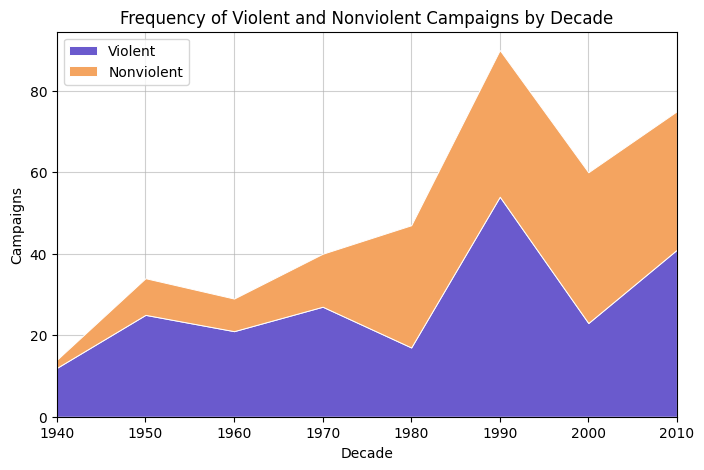

In [9]:

# Convert EYEAR to decades
campaigns['Decade'] = (campaigns['EYEAR'] // 10) * 10

# Group by decade and count the occurrences of violent and nonviolent campaigns
counts = campaigns.groupby(['Decade'])[['VIOL', 'NONVIOL']].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.stackplot(counts['Decade'], counts['VIOL'], counts['NONVIOL'], labels=['Violent', 'Nonviolent'],
               colors=['slateblue', 'sandybrown'], linewidth=0.7, edgecolor='white')
plt.xlabel('Decade')
plt.ylabel('Campaigns')
plt.title('Frequency of Violent and Nonviolent Campaigns by Decade')
plt.legend(loc='upper left')
# adjust grid lines and set them behind plotted data
plt.gca().set_axisbelow(True)
# set x-axis limits to the min and max of the decade column
plt.xlim(counts['Decade'].min(), counts['Decade'].max())
plt.grid(True, alpha=0.6)
plt.show()


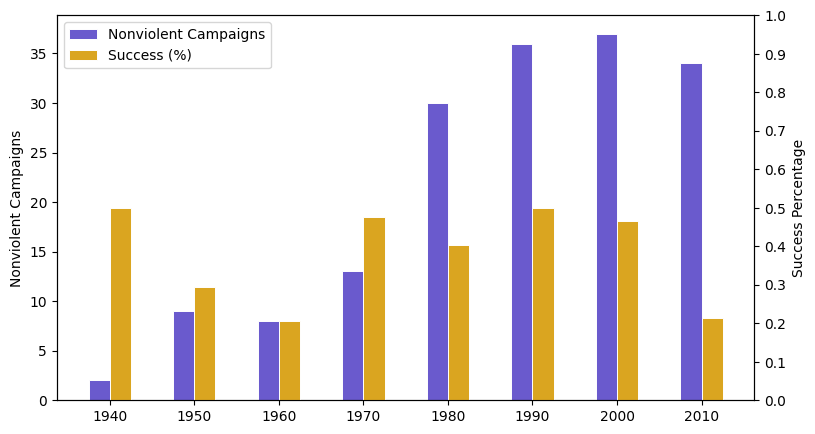

In [16]:
# Filter data from 1940 onwards
campaigns_filtered = campaigns[campaigns['EYEAR'] >= 1940]

# Calculate the counts of nonviolent campaigns per decade
campaigns_filtered['Decade'] = (campaigns_filtered['EYEAR'] // 10) * 10
nonviolent_counts = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('Decade').size()

# Convert index to integers
nonviolent_counts.index = nonviolent_counts.index.astype(int)  

# Calculate the mean success percentage per decade (scaled from 0 to 1)
success_percentage = campaigns_filtered.groupby('Decade')['SUCCESS'].mean()

# Create bar plot for each decade with side-by-side bars for counts and success percentage
bar_width = 0.25
index = np.arange(len(nonviolent_counts))

fig, ax1 = plt.subplots(figsize=(9, 5))

# Plotting bars for counts of nonviolent campaigns
ax1.bar(index - bar_width/2, nonviolent_counts, bar_width, color='slateblue', label='Nonviolent Campaigns', linewidth=0.7, edgecolor='white')
ax1.set_ylabel('Nonviolent Campaigns')
ax1.set_xticks(index)
ax1.set_xticklabels(nonviolent_counts.index)

# Create a twin axis for success percentage (right)
ax2 = ax1.twinx()
# Plotting bars for success percentage
ax2.bar(index + bar_width/2, success_percentage, bar_width, color='goldenrod', label='Success (%)', linewidth=0.7, edgecolor='white')
ax2.set_ylabel('Success Percentage')
ax2.set_ylim(0, 1)  # Set the y-axis limit from 0 to 1
ax2.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks to represent the scaled range (0 to 1)

# Combine both legends and display
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.grid(False)
plt.show()


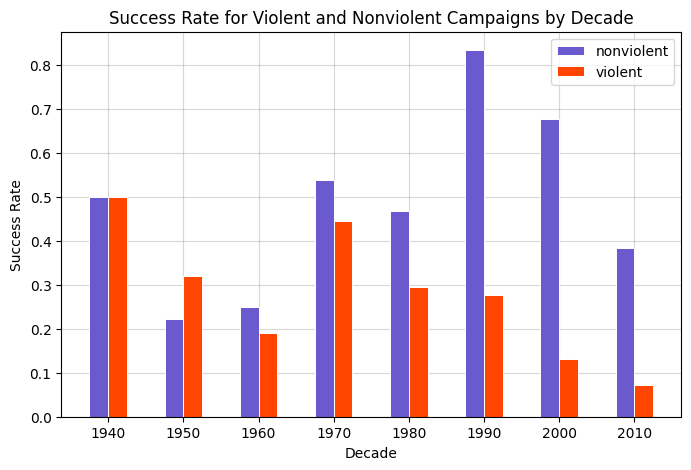

In [36]:
# needed data
violent_counts = campaigns_filtered[campaigns_filtered['VIOL'] == 1].groupby('Decade').size()
nonviolent_counts = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('Decade').size()
success_percentage = campaigns_filtered.groupby('Decade')['SUCCESS'].mean()

success_percentage_nonviolent = campaigns_filtered[campaigns_filtered['NONVIOL'] == 1].groupby('Decade')['SUCCESS'].mean()
success_percentage_violent = campaigns_filtered[campaigns_filtered['VIOL'] == 1].groupby('Decade')['SUCCESS'].mean()
num_decades = len(success_percentage_nonviolent)
# Assuming you have 'success_percentage_violent' and 'success_percentage_nonviolent' calculated

# Create a line plot for success rates of violent and nonviolent campaigns by decade
plt.figure(figsize=(8, 5))

bar_width = 0.25

plt.bar(index - bar_width/2, success_percentage_nonviolent, bar_width, color='slateblue', label='nonviolent', linewidth=0.7, edgecolor='white')
plt.bar(index + bar_width/2, success_percentage_violent, bar_width, color='orangered', label='violent', linewidth=0.7, edgecolor='white')

# Labeling and customization
plt.xlabel('Decade')
plt.ylabel('Success Rate')
plt.title('Success Rate for Violent and Nonviolent Campaigns by Decade')
plt.xticks(np.arange(num_decades), success_percentage_nonviolent.index.astype(int))
plt.legend()
# adjust grid lines and set them behind plotted data
plt.gca().set_axisbelow(True)
plt.grid(True, alpha=0.5)
plt.show()
